In [52]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import calendar
import matplotlib.dates as mdates
flu_data = "Resources/Outpatient_Flu_Positive.csv"
flu_df = pd.read_csv(flu_data)
flu_df.head().style.hide_index()

season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
2009-2010,200940,10/10/2009,Bay Area,Influenza_A,36,220,16.36
2009-2010,200940,10/10/2009,Bay Area,Influenza_B,0,220,0
2009-2010,200940,10/10/2009,Bay Area,Total_Influenza,36,220,16.36
2009-2010,200940,10/10/2009,Bay Area,RSV,0,190,0
2009-2010,200940,10/10/2009,California,Influenza_A,1077,3324,32.4


In [2]:
#Filter the DF by year (2017-18)
fluCal_df=flu_df.loc[flu_df['season'] == '2017-2018']
fluCal_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
29263,2017-2018,201740,10/7/2017,Bay Area,Influenza_A,14,393,3.56
29264,2017-2018,201740,10/7/2017,Bay Area,Influenza_B,1,393,0.25
29265,2017-2018,201740,10/7/2017,Bay Area,Total_Influenza,15,393,3.82
29266,2017-2018,201740,10/7/2017,Bay Area,RSV,5,377,1.33
29267,2017-2018,201740,10/7/2017,Bay Area,Adenovirus,4,242,1.65
...,...,...,...,...,...,...,...,...
36174,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_2,14,521,2.69
36175,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_3,6,521,1.15
36176,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_4,5,521,0.96
36177,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_UnknownType,0,521,0.00


In [3]:
#Pop out the two digit Month from the Weekending column and input into a new Month column
fluCal_df["Month"] = fluCal_df["weekending"].apply(lambda d: d[:2])

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
#Convert 2 digit month into Month abbreviation
look_up = {'10': 'Oct', '11': "Nov", '12': "Dec", '1/': "Jan", '2/':"Feb", '3/': "Mar", '4/': "Apr", '5/': "May", '6/': "Jun",
           '7/': "Jul", '8/': "Aug", '9/': "Sep"}

fluCal_df['Month'] = fluCal_df['Month'].apply(lambda x: look_up[x])
fluCal_df

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
29263,2017-2018,201740,10/7/2017,Bay Area,Influenza_A,14,393,3.56,Oct
29264,2017-2018,201740,10/7/2017,Bay Area,Influenza_B,1,393,0.25,Oct
29265,2017-2018,201740,10/7/2017,Bay Area,Total_Influenza,15,393,3.82,Oct
29266,2017-2018,201740,10/7/2017,Bay Area,RSV,5,377,1.33,Oct
29267,2017-2018,201740,10/7/2017,Bay Area,Adenovirus,4,242,1.65,Oct
...,...,...,...,...,...,...,...,...,...
36174,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_2,14,521,2.69,Sep
36175,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_3,6,521,1.15,Sep
36176,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_4,5,521,0.96,Sep
36177,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_UnknownType,0,521,0.00,Sep


In [5]:
#Filter data frame by Respiratory_Virus=Total_Influenza and region=California
fluCal_df=fluCal_df.loc[fluCal_df['Respiratory_Virus'] == 'Total_Influenza'].loc[fluCal_df['region'] == 'California']
fluCal_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
29284,2017-2018,201740,10/7/2017,California,Total_Influenza,59,1913,3.08,Oct
29417,2017-2018,201741,10/14/2017,California,Total_Influenza,63,2101,3.00,Oct
29550,2017-2018,201742,10/21/2017,California,Total_Influenza,81,2192,3.70,Oct
29683,2017-2018,201743,10/28/2017,California,Total_Influenza,135,2279,5.92,Oct
29816,2017-2018,201744,11/4/2017,California,Total_Influenza,165,2394,6.89,Nov
29949,2017-2018,201745,11/11/2017,California,Total_Influenza,211,2614,8.07,Nov
30082,2017-2018,201746,11/18/2017,California,Total_Influenza,219,2683,8.16,Nov
30215,2017-2018,201747,11/25/2017,California,Total_Influenza,295,2611,11.30,Nov
30348,2017-2018,201748,12/2/2017,California,Total_Influenza,374,3123,11.98,Dec
30481,2017-2018,201749,12/9/2017,California,Total_Influenza,609,3476,17.52,Dec


In [6]:
#Assign month numbers to each month
months = {}
i= 1
for date_idx in [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    month_name = datetime.datetime(2017, date_idx, 1).strftime("%b")
    months[month_name] = i
    i=i+1
print(months)

{'Oct': 1, 'Nov': 2, 'Dec': 3, 'Jan': 4, 'Feb': 5, 'Mar': 6, 'Apr': 7, 'May': 8, 'Jun': 9, 'Jul': 10, 'Aug': 11, 'Sep': 12}


In [16]:
#Create a  new column for the month number and map to each month
fluCal_df["month_number"] = fluCal_df["Month"].map(months)
fluCal_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month,month_number
29284,2017-2018,201740,10/7/2017,California,Total_Influenza,59,1913,3.08,Oct,1
29417,2017-2018,201741,10/14/2017,California,Total_Influenza,63,2101,3.00,Oct,1
29550,2017-2018,201742,10/21/2017,California,Total_Influenza,81,2192,3.70,Oct,1
29683,2017-2018,201743,10/28/2017,California,Total_Influenza,135,2279,5.92,Oct,1
29816,2017-2018,201744,11/4/2017,California,Total_Influenza,165,2394,6.89,Nov,2
29949,2017-2018,201745,11/11/2017,California,Total_Influenza,211,2614,8.07,Nov,2
30082,2017-2018,201746,11/18/2017,California,Total_Influenza,219,2683,8.16,Nov,2
30215,2017-2018,201747,11/25/2017,California,Total_Influenza,295,2611,11.30,Nov,2
30348,2017-2018,201748,12/2/2017,California,Total_Influenza,374,3123,11.98,Dec,3
30481,2017-2018,201749,12/9/2017,California,Total_Influenza,609,3476,17.52,Dec,3


In [17]:
#Create a new variable which caluclates the sum of Number of Positive test for each month
y_fluCal = fluCal_df.groupby('month_number')['Number_Positive'].sum()
print(y_fluCal)


month_number
1      338
2      890
3     6980
4     8607
5     4994
6     4913
7      668
8      120
9       24
10      19
11      16
12      36
Name: Number_Positive, dtype: int64


In [10]:
#Create fluCal1 DF and filter by season=2016-17
fluCal1_df=flu_df.loc[flu_df['season'] == '2016-2017']

In [11]:
#Pop out the two digit Month from the Weekending column and input into a new Month column
fluCal1_df["Month"] = fluCal1_df["weekending"].apply(lambda d: d[:2])

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
look_up = {'10': 'Oct', '11': "Nov", '12': "Dec", '1/': "Jan", '2/':"Feb", '3/': "Mar", '4/': "Apr", '5/': "May", '6/': "Jun",
           '7/': "Jul", '8/': "Aug", '9/': "Sep"}

fluCal1_df['Month'] = fluCal1_df['Month'].apply(lambda x: look_up[x])
fluCal1_df

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
22347,2016-2017,201640,10/8/2016,Bay Area,Influenza_A,6,299,2.01,Oct
22348,2016-2017,201640,10/8/2016,Bay Area,Influenza_B,1,299,0.33,Oct
22349,2016-2017,201640,10/8/2016,Bay Area,Total_Influenza,7,299,2.34,Oct
22350,2016-2017,201640,10/8/2016,Bay Area,RSV,4,255,1.57,Oct
22351,2016-2017,201640,10/8/2016,Bay Area,Adenovirus,2,187,1.07,Oct
...,...,...,...,...,...,...,...,...,...
29258,2016-2017,201739,9/30/2017,Upper/Lower Southern,Parainfluenza_2,0,596,0.00,Sep
29259,2016-2017,201739,9/30/2017,Upper/Lower Southern,Parainfluenza_3,4,596,0.67,Sep
29260,2016-2017,201739,9/30/2017,Upper/Lower Southern,Parainfluenza_4,2,596,0.34,Sep
29261,2016-2017,201739,9/30/2017,Upper/Lower Southern,Parainfluenza_UnknownType,0,596,0.00,Sep


In [19]:
fluCal1_df = fluCal1_df.loc[fluCal1_df['Respiratory_Virus'] == 'Total_Influenza'].loc[fluCal1_df['region'] == 'California']
fluCal1_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month,month_number
22368,2016-2017,201640,10/8/2016,California,Total_Influenza,19,1409,1.35,Oct,1
22501,2016-2017,201641,10/15/2016,California,Total_Influenza,39,1491,2.62,Oct,1
22634,2016-2017,201642,10/22/2016,California,Total_Influenza,38,1632,2.33,Oct,1
22767,2016-2017,201643,10/29/2016,California,Total_Influenza,51,1800,2.83,Oct,1
22900,2016-2017,201644,11/5/2016,California,Total_Influenza,49,1922,2.55,Nov,2
23033,2016-2017,201645,11/12/2016,California,Total_Influenza,72,2143,3.36,Nov,2
23166,2016-2017,201646,11/19/2016,California,Total_Influenza,83,2357,3.52,Nov,2
23299,2016-2017,201647,11/26/2016,California,Total_Influenza,95,2153,4.41,Nov,2
23432,2016-2017,201648,12/3/2016,California,Total_Influenza,119,2760,4.31,Dec,3
23565,2016-2017,201649,12/10/2016,California,Total_Influenza,214,2918,7.33,Dec,3


In [20]:
months = {}
i= 1
for date_idx in [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    month_name = datetime.datetime(2017, date_idx, 1).strftime("%b")
    months[month_name] = i
    i=i+1
print(months)

{'Oct': 1, 'Nov': 2, 'Dec': 3, 'Jan': 4, 'Feb': 5, 'Mar': 6, 'Apr': 7, 'May': 8, 'Jun': 9, 'Jul': 10, 'Aug': 11, 'Sep': 12}


In [21]:
fluCal1_df["month_number"] = fluCal1_df["Month"].map(months)
fluCal1_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month,month_number
22368,2016-2017,201640,10/8/2016,California,Total_Influenza,19,1409,1.35,Oct,1
22501,2016-2017,201641,10/15/2016,California,Total_Influenza,39,1491,2.62,Oct,1
22634,2016-2017,201642,10/22/2016,California,Total_Influenza,38,1632,2.33,Oct,1
22767,2016-2017,201643,10/29/2016,California,Total_Influenza,51,1800,2.83,Oct,1
22900,2016-2017,201644,11/5/2016,California,Total_Influenza,49,1922,2.55,Nov,2
23033,2016-2017,201645,11/12/2016,California,Total_Influenza,72,2143,3.36,Nov,2
23166,2016-2017,201646,11/19/2016,California,Total_Influenza,83,2357,3.52,Nov,2
23299,2016-2017,201647,11/26/2016,California,Total_Influenza,95,2153,4.41,Nov,2
23432,2016-2017,201648,12/3/2016,California,Total_Influenza,119,2760,4.31,Dec,3
23565,2016-2017,201649,12/10/2016,California,Total_Influenza,214,2918,7.33,Dec,3


In [22]:
y_fluCal1 = fluCal1_df.groupby('month_number')['Number_Positive'].sum()
print(y_fluCal1)

month_number
1      147
2      299
3     2894
4     6302
5     3816
6     1451
7      880
8      312
9      198
10      83
11      36
12     121
Name: Number_Positive, dtype: int64


In [23]:
#Create fluCal2 DF and filter by season=2015-16
fluCal2_df=flu_df.loc[flu_df['season'] == '2015-2016']

In [24]:
#Pop out the two digit Month from the Weekending column and input into a new Month column
fluCal2_df["Month"] = fluCal2_df["weekending"].apply(lambda d: d[:2])

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
look_up = {'10': 'Oct', '11': "Nov", '12': "Dec", '1/': "Jan", '2/':"Feb", '3/': "Mar", '4/': "Apr", '5/': "May", '6/': "Jun",
           '7/': "Jul", '8/': "Aug", '9/': "Sep"}

fluCal2_df['Month'] = fluCal2_df['Month'].apply(lambda x: look_up[x])

fluCal2_df

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
15431,2015-2016,201540,10/10/2015,Bay Area,Influenza_A,2,302,0.66,Oct
15432,2015-2016,201540,10/10/2015,Bay Area,Influenza_B,1,302,0.33,Oct
15433,2015-2016,201540,10/10/2015,Bay Area,Total_Influenza,3,302,0.99,Oct
15434,2015-2016,201540,10/10/2015,Bay Area,RSV,3,292,1.03,Oct
15435,2015-2016,201540,10/10/2015,Bay Area,Adenovirus,2,118,1.69,Oct
...,...,...,...,...,...,...,...,...,...
22342,2015-2016,201639,10/1/2016,Upper/Lower Southern,Parainfluenza_2,15,459,3.27,Oct
22343,2015-2016,201639,10/1/2016,Upper/Lower Southern,Parainfluenza_3,10,459,2.18,Oct
22344,2015-2016,201639,10/1/2016,Upper/Lower Southern,Parainfluenza_4,2,459,0.44,Oct
22345,2015-2016,201639,10/1/2016,Upper/Lower Southern,Parainfluenza_UnknownType,0,459,0.00,Oct


In [27]:
fluCal2_df = fluCal2_df.loc[fluCal2_df['Respiratory_Virus'] == 'Total_Influenza'].loc[fluCal2_df['region'] == 'California']
fluCal2_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
15452,2015-2016,201540,10/10/2015,California,Total_Influenza,15,1153,1.30,Oct
15585,2015-2016,201541,10/17/2015,California,Total_Influenza,6,1184,0.51,Oct
15718,2015-2016,201542,10/24/2015,California,Total_Influenza,7,1096,0.64,Oct
15851,2015-2016,201543,10/31/2015,California,Total_Influenza,6,1091,0.55,Oct
15984,2015-2016,201544,11/7/2015,California,Total_Influenza,14,1435,0.98,Nov
16117,2015-2016,201545,11/14/2015,California,Total_Influenza,11,1615,0.68,Nov
16250,2015-2016,201546,11/21/2015,California,Total_Influenza,16,1574,1.02,Nov
16383,2015-2016,201547,11/28/2015,California,Total_Influenza,12,1573,0.76,Nov
16516,2015-2016,201548,12/5/2015,California,Total_Influenza,35,1921,1.82,Dec
16649,2015-2016,201549,12/12/2015,California,Total_Influenza,25,1787,1.40,Dec


In [28]:
months = {}
i= 1
for date_idx in [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    month_name = datetime.datetime(2017, date_idx, 1).strftime("%b")
    months[month_name] = i
    i=i+1
print(months)

{'Oct': 1, 'Nov': 2, 'Dec': 3, 'Jan': 4, 'Feb': 5, 'Mar': 6, 'Apr': 7, 'May': 8, 'Jun': 9, 'Jul': 10, 'Aug': 11, 'Sep': 12}


In [29]:
fluCal2_df["month_number"] = fluCal2_df["Month"].map(months)
fluCal2_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month,month_number
15452,2015-2016,201540,10/10/2015,California,Total_Influenza,15,1153,1.30,Oct,1
15585,2015-2016,201541,10/17/2015,California,Total_Influenza,6,1184,0.51,Oct,1
15718,2015-2016,201542,10/24/2015,California,Total_Influenza,7,1096,0.64,Oct,1
15851,2015-2016,201543,10/31/2015,California,Total_Influenza,6,1091,0.55,Oct,1
15984,2015-2016,201544,11/7/2015,California,Total_Influenza,14,1435,0.98,Nov,2
16117,2015-2016,201545,11/14/2015,California,Total_Influenza,11,1615,0.68,Nov,2
16250,2015-2016,201546,11/21/2015,California,Total_Influenza,16,1574,1.02,Nov,2
16383,2015-2016,201547,11/28/2015,California,Total_Influenza,12,1573,0.76,Nov,2
16516,2015-2016,201548,12/5/2015,California,Total_Influenza,35,1921,1.82,Dec,3
16649,2015-2016,201549,12/12/2015,California,Total_Influenza,25,1787,1.40,Dec,3


In [30]:
y_fluCal2 = fluCal2_df.groupby('month_number')['Number_Positive'].sum()
print(y_fluCal2)

month_number
1       59
2       53
3      222
4     1834
5     4418
6     3312
7     1076
8      146
9       24
10      14
11      13
12      38
Name: Number_Positive, dtype: int64


In [35]:
#Create fluCal3 DF and filter by season=2014-15
fluCal3_df=flu_df.loc[flu_df['season'] == '2014-2015']

In [36]:
#Pop out the two digit Month from the Weekending column and input into a new Month column
fluCal3_df["Month"] = fluCal3_df["weekending"].apply(lambda d: d[:2])

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
look_up = {'10': 'Oct', '11': "Nov", '12': "Dec", '1/': "Jan", '2/':"Feb", '3/': "Mar", '4/': "Apr", '5/': "May", '6/': "Jun",
           '7/': "Jul", '8/': "Aug", '9/': "Sep"}

fluCal3_df['Month'] = fluCal3_df['Month'].apply(lambda x: look_up[x])

fluCal3_df

C:\Users\samir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
10608,2014-2015,201440,10/4/2014,Bay Area,Influenza_A,2,207,0.97,Oct
10609,2014-2015,201440,10/4/2014,Bay Area,Influenza_B,3,207,1.45,Oct
10610,2014-2015,201440,10/4/2014,Bay Area,Total_Influenza,5,207,2.42,Oct
10611,2014-2015,201440,10/4/2014,Bay Area,RSV,8,207,3.86,Oct
10612,2014-2015,201440,10/4/2014,Bay Area,Adenovirus,4,148,2.70,Oct
...,...,...,...,...,...,...,...,...,...
15426,2014-2015,201539,10/3/2015,Upper/Lower Southern,Parainfluenza_2,0,352,0.00,Oct
15427,2014-2015,201539,10/3/2015,Upper/Lower Southern,Parainfluenza_3,0,352,0.00,Oct
15428,2014-2015,201539,10/3/2015,Upper/Lower Southern,Parainfluenza_4,4,352,1.14,Oct
15429,2014-2015,201539,10/3/2015,Upper/Lower Southern,Parainfluenza_UnknownType,0,352,0.00,Oct


In [38]:
fluCal3_df = fluCal3_df.loc[fluCal3_df['Respiratory_Virus'] == 'Total_Influenza'].loc[fluCal3_df['region'] == 'California']
fluCal3_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month
10623,2014-2015,201440,10/4/2014,California,Total_Influenza,10,585,1.71,Oct
10714,2014-2015,201441,10/11/2014,California,Total_Influenza,19,1413,1.34,Oct
10805,2014-2015,201442,10/18/2014,California,Total_Influenza,12,954,1.26,Oct
10896,2014-2015,201443,10/25/2014,California,Total_Influenza,12,1061,1.13,Oct
10987,2014-2015,201444,11/1/2014,California,Total_Influenza,31,1024,3.03,Nov
11078,2014-2015,201445,11/8/2014,California,Total_Influenza,21,1184,1.77,Nov
11169,2014-2015,201446,11/15/2014,California,Total_Influenza,28,1189,2.35,Nov
11260,2014-2015,201447,11/22/2014,California,Total_Influenza,31,1254,2.47,Nov
11351,2014-2015,201448,11/29/2014,California,Total_Influenza,45,1402,3.21,Nov
11442,2014-2015,201449,12/6/2014,California,Total_Influenza,104,1561,6.66,Dec


In [49]:
months = {}
i= 1
for date_idx in [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    month_name = datetime.datetime(2014, date_idx, 1).strftime("%b")
    months[month_name] = i
    i=i+1
print(months)

{'Oct': 1, 'Nov': 2, 'Dec': 3, 'Jan': 4, 'Feb': 5, 'Mar': 6, 'Apr': 7, 'May': 8, 'Jun': 9, 'Jul': 10, 'Aug': 11, 'Sep': 12}


In [50]:
fluCal3_df["month_number"] = fluCal3_df["Month"].map(months)
fluCal3_df

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive,Month,month_number
10623,2014-2015,201440,10/4/2014,California,Total_Influenza,10,585,1.71,Oct,1
10714,2014-2015,201441,10/11/2014,California,Total_Influenza,19,1413,1.34,Oct,1
10805,2014-2015,201442,10/18/2014,California,Total_Influenza,12,954,1.26,Oct,1
10896,2014-2015,201443,10/25/2014,California,Total_Influenza,12,1061,1.13,Oct,1
10987,2014-2015,201444,11/1/2014,California,Total_Influenza,31,1024,3.03,Nov,2
11078,2014-2015,201445,11/8/2014,California,Total_Influenza,21,1184,1.77,Nov,2
11169,2014-2015,201446,11/15/2014,California,Total_Influenza,28,1189,2.35,Nov,2
11260,2014-2015,201447,11/22/2014,California,Total_Influenza,31,1254,2.47,Nov,2
11351,2014-2015,201448,11/29/2014,California,Total_Influenza,45,1402,3.21,Nov,2
11442,2014-2015,201449,12/6/2014,California,Total_Influenza,104,1561,6.66,Dec,3


In [41]:
y_fluCal3 = fluCal3_df.groupby('month_number')['Number_Positive'].sum()
print(y_fluCal3)

month_number
1       66
2      156
3      895
4     5984
5     2608
6      705
7      309
8      235
9       34
10      17
11       8
12      32
Name: Number_Positive, dtype: int64


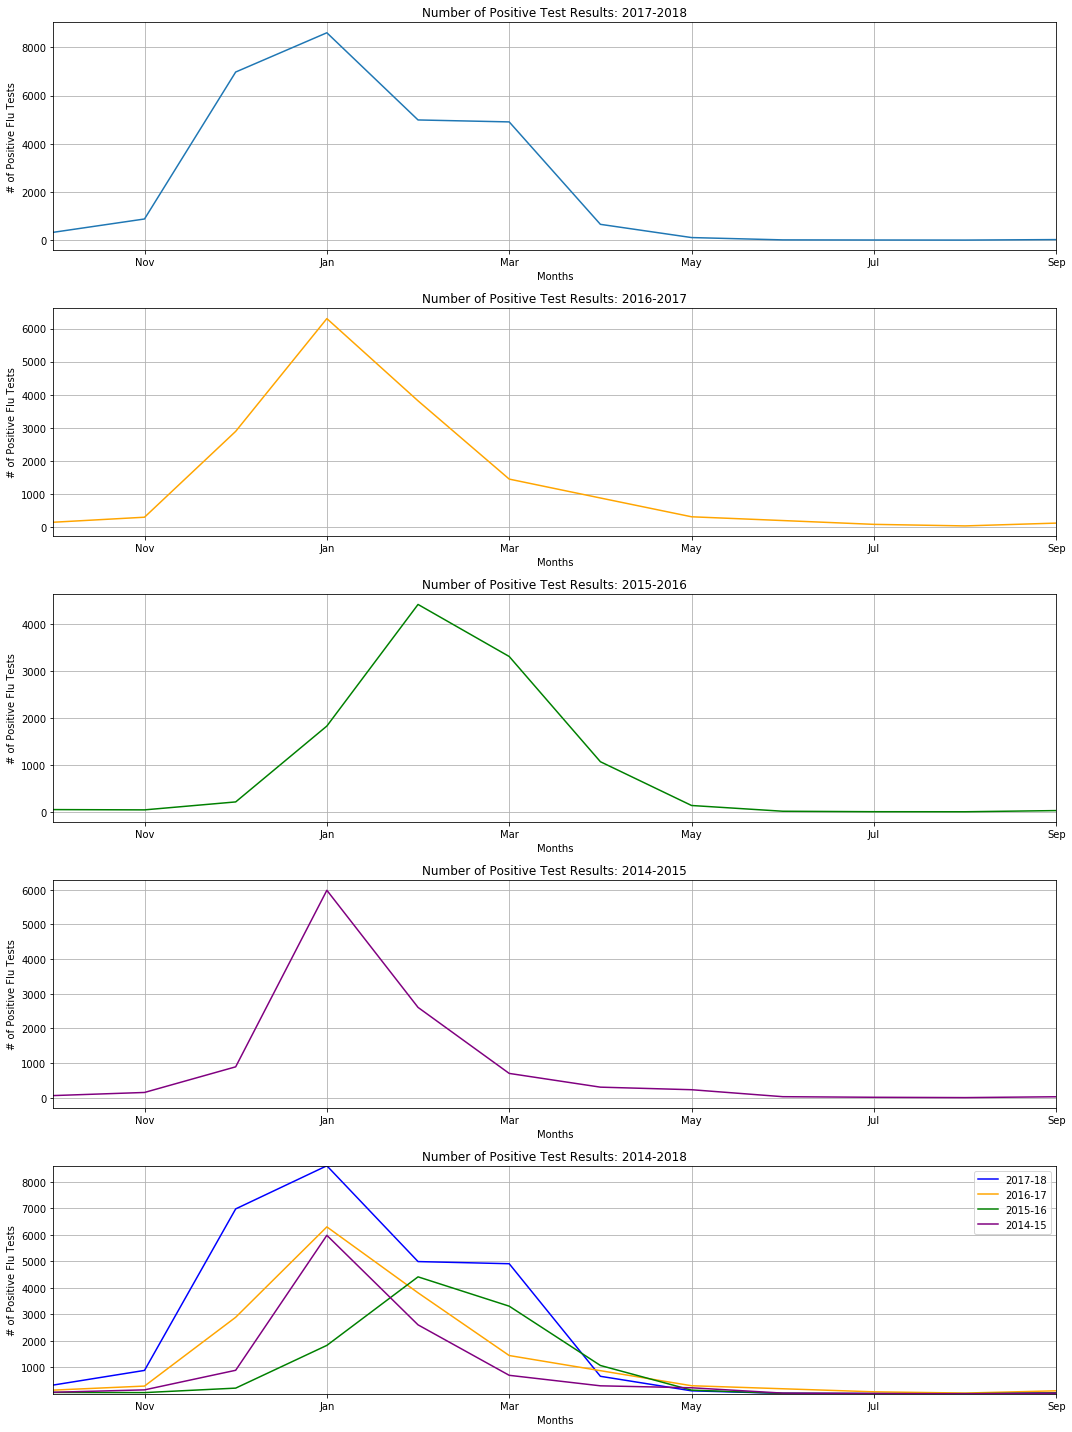

In [85]:
# Create for subplots, ax1, ax2, and ax3
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(15,20), nrows=5, ncols=1)

# Use ax1 to plot positive flu test for each month in 2017-18
#fluCal_df.groupby('Month')['Number_Positive'].sum()
y_fluCal.plot(y='Number_Positive', legend=False, ax=ax1, x_compat=True)
ax1.set_xlabel('Months')
ax1.set_ylabel('# of Positive Flu Tests')
ax1.set_title("Number of Positive Test Results: 2017-2018")
labels = ['Oct','Nov','Jan','Mar','May','Jul','Sep']
ax1.set_xticklabels(labels,rotation="horizontal")
ax1.grid()
plt.margins(0)

# Use ax2 to plot positive flu test for each month in 2016-17
#fluCal1_df.groupby('Month')['Number_Positive'].sum()
y_fluCal1.plot(y='Number_Positive', legend=False, ax=ax2, color= "orange")
ax2.set_xlabel('Months')
ax2.set_ylabel('# of Positive Flu Tests')
ax2.set_title("Number of Positive Test Results: 2016-2017")
labels = ['Oct','Nov','Jan','Mar','May','Jul','Sep']
ax2.set_xticklabels(labels,rotation="horizontal")
ax2.grid()

# Use ax3 to plot positive flu test for each month in 2015-16
#fluCal2_df.groupby('Month')['Number_Positive'].sum()
y_fluCal2.plot(y='Number_Positive', legend=False, ax=ax3, color= "green")
ax3.set_xlabel('Months')
ax3.set_ylabel('# of Positive Flu Tests')
ax3.set_title("Number of Positive Test Results: 2015-2016")
labels = ['Oct','Nov','Jan','Mar','May','Jul','Sep']
ax3.set_xticklabels(labels,rotation="horizontal")
ax3.grid()

# Use ax4 to plot positive flu test for each month in 2014-15
#fluCal3_df.groupby('Month')['Number_Positive'].sum()
y_fluCal3.plot(y='Number_Positive', legend=False, ax=ax4, color= "purple")
ax4.set_xlabel('Months')
ax4.set_ylabel('# of Positive Flu Tests')
ax4.set_title("Number of Positive Test Results: 2014-2015")
labels = ['Oct','Nov','Jan','Mar','May','Jul','Sep']
ax4.set_xticklabels(labels,rotation="horizontal")
ax4.grid()

#Use ax5 to plot positive flu test for each month for 2014-15, 2015-16, 2016-17, 2017-18
y_fluCal.plot(y='Number_Positive', legend=False, ax=ax5, color= "blue", label='2017-18')
y_fluCal1.plot(y='Number_Positive', legend=False, ax=ax5, color= "orange", label='2016-17')
y_fluCal2.plot(y='Number_Positive', legend=False, ax=ax5, color= "green", label='2015-16')
y_fluCal3.plot(y='Number_Positive', legend=False, ax=ax5, color= "purple", label='2014-15')
ax5.set_xlabel('Months')
ax5.set_ylabel('# of Positive Flu Tests')
ax5.set_title("Number of Positive Test Results: 2014-2018")
labels = ['Oct','Nov','Jan','Mar','May','Jul','Sep']
ax5.set_xticklabels(labels,rotation="horizontal")
ax5.grid()
ax5.legend()

# Update Plot Asthetics
plt.margins(0)
#plt.show()
plt.tight_layout()